# Basics of Filtering

In order to understand the importance of the assumptions for a Fourier Series representation, we will consider the Fourier Series of different functions:


- A function infinitely many continuous derivatives (analytic):
$$f(x) = \frac{1}{5-4\cos(\pi x)}$$

- A function that is continuous, but does not have continuous derivatives:
$$g(x) = \bigg|\sin(\pi x)\bigg|$$

- And, lastly, a discontinous function
$$h(x) = \begin{cases}1,\quad & x \in \left(-\frac{1}{2},\frac{1}{2}\right)\\
0,\quad & \text{else}
\end{cases}$$


([], [])

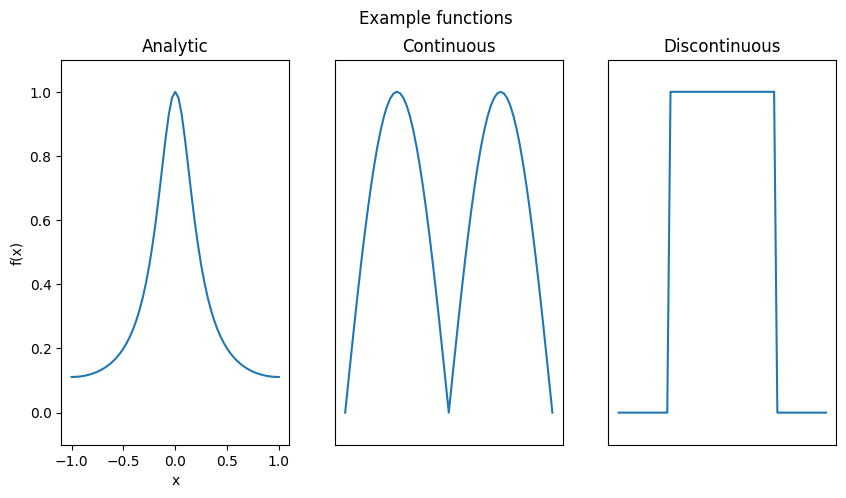

In [ ]:
# import necessary stuff for code
import numpy as np
import sympy as sym
import scipy
import matplotlib.pyplot as plt
import math

from decimal import Decimal

# To display better tables
import pandas as pd


plt.rcParams['figure.figsize'] = [10, 5]

xLeft = -1
xRight = 1 
domainlen = xRight - xLeft
Nx = 64
x = np.linspace(xLeft,xRight,Nx+1)

fexact = np.zeros((3,Nx+1))
fexact[0,:] = 1/(5-4*np.cos(np.pi*x))
fexact[1,:]= abs(np.sin(np.pi*x))
fexact[2,:]= np.piecewise(x, [x < -0.5, -0.5 <= x , x > 0.5], [0, 1, 0])

plt.figure()
plt.suptitle('Example functions')

plt.subplot(131)
plt.plot(x,fexact[0,:])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Analytic')
plt.ylim([-0.1,1.1])


plt.subplot(132)
plt.plot(x,fexact[1,:])
plt.title('Continuous')
plt.ylim([-0.1,1.1])
plt.yticks([])
plt.xticks([])

plt.subplot(133)
plt.plot(x,fexact[2,:])
plt.title('Discontinuous')
plt.ylim([-0.1,1.1])
plt.yticks([])
plt.xticks([])
plt.xticks([])


# Truncated Fourier Series Approximation (Spectral)

In order to understand what filters do, we will consider the Fourier Series of a function:
$$f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty\, \left(a_n\cos(\omega_n x) + b_n\sin(\omega_n x)\right), \qquad x \in \Omega = [x_L,x_R],$$
with $\omega_n = \frac{2\pi}{|\Omega|},\, |\Omega| = x_R-x_L$ and 
$$a_n = \frac{2}{| \Omega |}\int_{\Omega}\, f(x)\cos(\omega_n x)\, dx,\quad b_n = \frac{2}{|\Omega|}\int_{\Omega}\, f(x)\sin(\omega_n x)\, dx.$$
We will specifically investigate the decay of the coefficients:
$$\hat{f_n} = \sqrt{a_n^2 + b_n^2}$$
as, by Bessel's inequality, the decay of the coefficients control the error.

Of course, we will need the truncated series...

([], [])

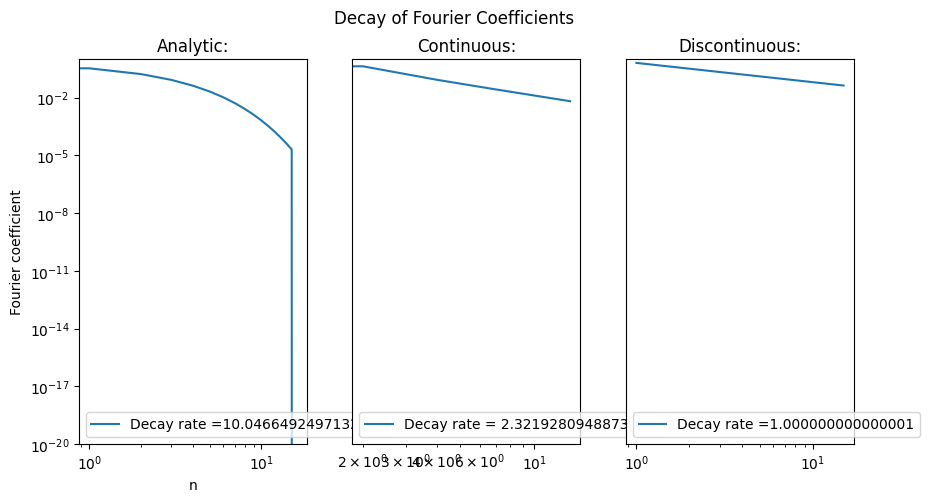

In [2]:
# Truncated trignometric Fourier series

N = 32 # number of Fourier coefficients if we would use the exponential series
Nhalf = int(N/2)
Nquart = int(N/4)
nwav = np.linspace(0, Nhalf, Nhalf + 1) # wavenumber
omegan = (2*np.pi/domainlen)*nwav

fcos = np.zeros((Nhalf+1,3))
fsin = np.zeros((Nhalf+1,3))
fhat = np.zeros((Nhalf+1,3))
fhatorders = np.zeros((Nhalf+1,3))  #np.zeros((Nhalf+1,3))

# Fourier coefficients for analytic function
fcos[0,0] = 1.0/3.0
fcos[1:Nhalf,0] =np.array([(0.5**i)/3.0 for i in range(Nhalf-1)]) 

# Fourier coefficients for continuous function, with no continuous derivatives
fcos[0,1] = 2/np.pi
fcos[1,1]= 0.0
fcos[2:Nhalf,1] = -2*np.divide((1+(-1)**nwav[2:Nhalf]),(np.pi*(nwav[2:Nhalf]**2-1)))

# Fourier coefficients for discontinuous function
fcos[0,2] = 0.5
fcos[1:Nhalf,2] = np.divide(np.sin(0.5*np.pi*nwav[1:Nhalf] ),(0.5*np.pi*nwav[1:Nhalf] ))

# Fourier coefficients for exponential series.
for m in np.arange(3):
    fhat[:,m] = np.sqrt(fcos[:,m]**2 + fsin[:,m]**2)
    
# Calculate order of decay using fhat(n) decays on the order of (1/n)^m ==> m = log(fhat(n+2)/fhat(n))/log(n/n+2)
fhatorders[3:-1,0] = np.divide(np.log(np.divide(fhat[2:-2,0],fhat[3:-1,0])),np.log(np.divide(nwav[3:-1],nwav[2:-2])))
fhatorders[4:-1:2,1] = np.divide(np.log(np.divide(fhat[2:-3:2,1],fhat[4:-1:2,1])),np.log(np.divide(nwav[4:-1:2],nwav[2:-3:2])))
fhatorders[3:-1:2,2] = np.divide(np.log(np.divide(fhat[1:-3:2,2],fhat[3:-1:2,2])),np.log(np.divide(nwav[3:-1:2],nwav[1:-3:2])))

plt.figure()
plt.suptitle('Decay of Fourier Coefficients')


plt.subplot(131)
plt.loglog(nwav,fhat[:,0])
plt.xlabel('n')
plt.legend(['Decay rate ='+str(np.max(fhatorders[:,0]))])
plt.ylabel('Fourier coefficient')
plt.title('Analytic:')
plt.ylim([10**(-20),10**0])


plt.subplot(132)
plt.loglog(nwav[0:-1:2],fhat[0:-1:2,1])
plt.title('Continuous:')
plt.legend(['Decay rate = '+str(np.max(fhatorders[:,1]))])
plt.ylim([10**(-20),10**0])
plt.yticks([])
#plt.xticks([])

plt.subplot(133)
plt.loglog(nwav[1:-1:2],fhat[1:-1:2,2])
plt.title('Discontinuous:')
plt.legend(['Decay rate ='+str(np.max(fhatorders[:,2]))])
#plt.xticks([])
plt.ylim([10**(-20),10**0])
plt.yticks([])


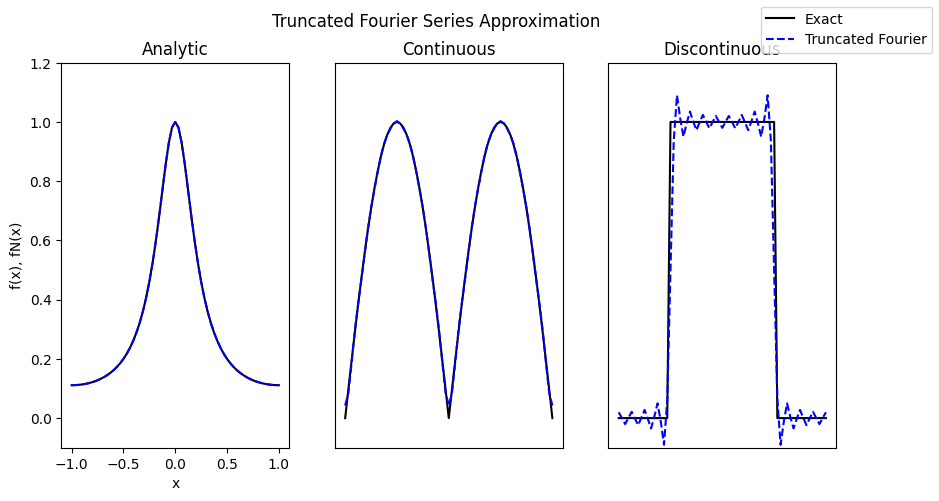

In [3]:
# Truncated Fourier Series Approximation (Spectral)

Costerm = np.zeros((Nx+1,Nhalf+1))
Sinterm = np.zeros((Nx+1,Nhalf+1))
for n in np.arange(Nhalf+1):
    Costerm[:,n] = np.cos(omegan[n]*x)
    Sinterm[:,n] = np.sin(omegan[n]*x)

FS = np.zeros((3,Nx+1))

plt.figure()
plt.suptitle('Truncated Fourier Series Approximation')

for m in np.arange(3): # loop over functions
    for j in np.arange(Nx+1): # loop over x
        FS[m,j] = np.dot(fcos[:,m],Costerm[j,:])+np.dot(fsin[:,m],Sinterm[j,:])
        

    if m == 0:
        plt.subplot(131)
        plt.xlabel('x')
        plt.ylabel('f(x), fN(x)')
        plt.title('Analytic')
    elif m == 1:
        plt.subplot(132)
        plt.title('Continuous')
    else:
        plt.subplot(133)
        plt.title('Discontinuous')

    plt.plot(x,fexact[m,:],'k',x,FS[m,:],'b--')
    plt.ylim([-0.1,1.2])
    
    if m!= 0:
        plt.yticks([])
        plt.xticks([])
        
plt.figlegend(['Exact','Truncated Fourier'],loc='outside upper right')

# Common Filters

Let us now look at what some standard filters do to the Fourier coefficients.  We will consider:

**Cesáro Filter:** $$\sigma(\eta) = 1 - \eta$$
**Lanczos Filter:** $$\sigma(\eta) = \frac{\sin(\pi\eta)}{\pi\eta}$$
**Dirichlet Filter:** $$\sigma(\eta) =\frac{\sin(\frac{\pi}{2}(N+1)(\eta+1))}{\frac{\pi}{2}(\eta+1)}$$
**Raised Cosine Filter:** $$\sigma(\eta) =\frac{1}{2}\left(1+\cos(\pi\eta)\right)$$


([], [])

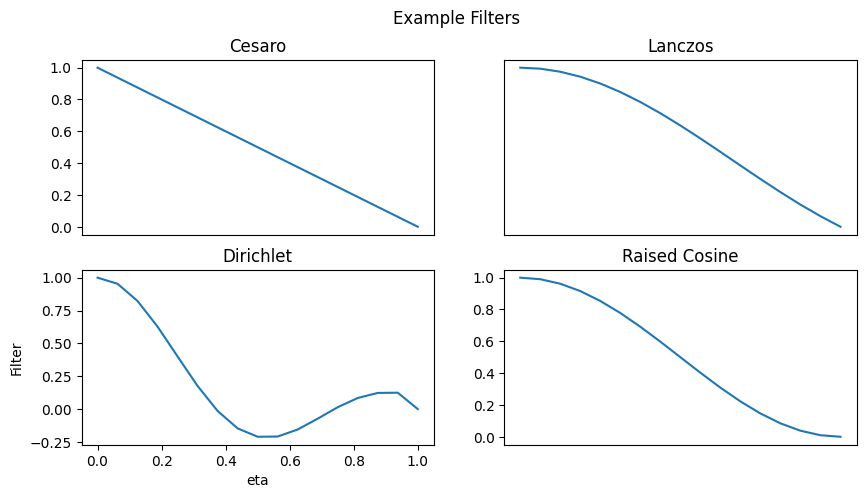

In [4]:
# filter variable
eta = nwav/Nhalf

# filter definitions
filter = np.zeros((Nhalf+1,5))

# Cesáro
filter[:,0] = 1 - eta

#Lanczos
filter[0,1] = 1.0
filter[1:Nhalf,1] = np.divide(np.sin(np.pi*eta[1:Nhalf]),(np.pi*eta[1:Nhalf]))


#Dirichlet
filter[0,2] = 1.0
filter[1:Nhalf,2] = np.divide(np.sin(0.5*(Nhalf+1)*eta[1:Nhalf]),(0.5*(Nhalf+1)*eta[1:Nhalf]))

#Raised cosine
filter[0:Nhalf,3] = 0.5*(1 + np.cos(np.pi*eta[0:Nhalf]))

plt.figure()
plt.suptitle('Example Filters')

plt.subplot(221)
plt.plot(eta,filter[:,0])
plt.title('Cesaro')
plt.xticks([])

plt.subplot(222)
plt.plot(eta,filter[:,1])
plt.title('Lanczos')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.plot(eta,filter[:,2])
plt.xlabel('eta')
plt.ylabel('Filter')
plt.title('Dirichlet')

plt.subplot(224)
plt.plot(eta,filter[:,3])
plt.title('Raised Cosine')
plt.xticks([])



C:\Users\adamh\AppData\Local\Temp\ipykernel_20944\265721799.py:42: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.loglog(nwav,fhatmod[:,m,mfilter], label=labelname)
C:\Users\adamh\AppData\Local\Temp\ipykernel_20944\265721799.py:50: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.loglog(nwav,fhatmod[:,m,mfilter], label=labelname)
C:\Users\adamh\AppData\Local\Temp\ipykernel_20944\265721799.py:57: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing

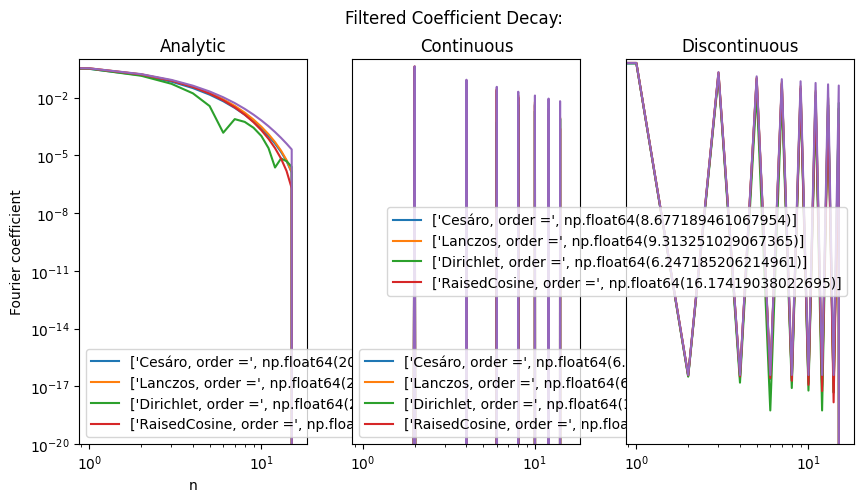

In [5]:
# Modified coefficients

fcosmod = np.zeros((Nhalf+1,3,5))
fsinmod = np.zeros((Nhalf+1,3,5))
fhatmod = np.zeros((Nhalf+1,3,5))
fhatmodorders = np.zeros((Nhalf+1,3,5))

plt.figure()
plt.suptitle('Filtered Coefficient Decay:')
for m in np.arange(3):
    for mfilter in np.arange(4):
        # filtered cosine/sine coefficients --> in terms of Nhalf
        fcosmod[:,m,mfilter] = np.multiply(filter[:,mfilter],fcos[:,m])
        fsinmod[:,m,mfilter] = np.multiply(filter[:,mfilter],fsin[:,m])
        
        fhatmod[:,m,mfilter] = np.sqrt(fcosmod[:,m,mfilter]**2 + fsinmod[:,m,mfilter]**2)
        
        if m == 0:
            fhatmodorders[3:-1,0,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[2:-2,0,mfilter],fhatmod[3:-1,0,mfilter]))),np.log(np.divide(nwav[3:-1],nwav[2:-2])))
        elif m==1:
            fhatmodorders[4:-1:2,1,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[2:-3:2,1,mfilter],fhatmod[4:-1:2,1,mfilter]))),np.log(np.divide(nwav[4:-1:2],nwav[2:-3:2])))
        else:
            fhatmodorders[3:-1:2,2,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[1:-3:2,2,mfilter],fhatmod[3:-1:2,2,mfilter]))),np.log(np.divide(nwav[3:-1:2],nwav[1:-3:2])))
        

        #orderminmax[0,m,mfilter+1] = np.nanmin(fhatmodorders[:,m,mfilter],axis=0) # min decay rate
        #orderminmax[1,m,mfilter+1] = np.nanmax(fhatmodorders[:,m,mfilter],axis=0) # max decay rate
        
       # DecayRateTable.index(orderminmax[:,m,mfilter])
        
        if mfilter == 0:
            labelname = ['Cesáro, order =',np.max(fhatmodorders[:,m,mfilter])]
        elif mfilter == 1:
            labelname = ['Lanczos, order =',np.max(fhatmodorders[:,m,mfilter])]
        elif mfilter == 2:
            labelname = ['Dirichlet, order =',np.max(fhatmodorders[:,m,mfilter])]
        elif mfilter == 3:
            labelname = ['RaisedCosine, order =',np.max(fhatmodorders[:,m,mfilter])]
        
        if m == 0:
            plt.subplot(131)
            plt.loglog(nwav,fhatmod[:,m,mfilter], label=labelname)
            plt.xlabel('n')
            plt.ylabel('Fourier coefficient')
            plt.title('Analytic')
            if mfilter==3:
                plt.legend()
        elif m == 1:
            plt.subplot(132)
            plt.loglog(nwav,fhatmod[:,m,mfilter], label=labelname)
        #   plt.loglog(nwav[0:-1:2],fhatmod[0:-1:2,m,mfilter])
            plt.title('Continuous')
            if mfilter==3:
                plt.legend()
        else:
            plt.subplot(133)
            plt.loglog(nwav,fhatmod[:,m,mfilter], label=labelname)
            #plt.loglog(nwav[1:-1:2],fhatmod[1:-1:2,m,mfilter])
            plt.title('Discontinuous')
            if mfilter==3:
                plt.legend()
        
    # plot original coefficient decay
    plt.loglog(nwav,fhat[:,m])
    plt.ylim([10**(-20),10**0])

    if m != 0:
        plt.yticks([])
        #plt.xticks([])
    


## General Filter
In general, a filter of order $r+1$ can be defined as
$$\sigma(x) = \sum_{\gamma = 0}^r\, c_\gamma \psi(x-x_\gamma)$$
Where $c_\gamma$ is defined by enforcing consistency:
$$  \int\, \sigma(y)\, dy = 1$$
and $r$ momemts:
$$  \int\, \sigma(y)y^m\, dy = x^m, \qquad m = 1,\dots,r$$

One example is taking $\psi$ to be a B-Spline of order $n$, 
$$\psi(x) = B_n(x) = \underbrace{\chi*\cdots*\chi}_{n\text{ times}},$$
with $c_\gamma = \lceil \frac{r}{2} \rceil - \gamma.$

$n$ controls the amount of dissipation.

$r$ controls the possible accuracy.




# Filtered Fourier Series Approximation


(17, 3, 5)


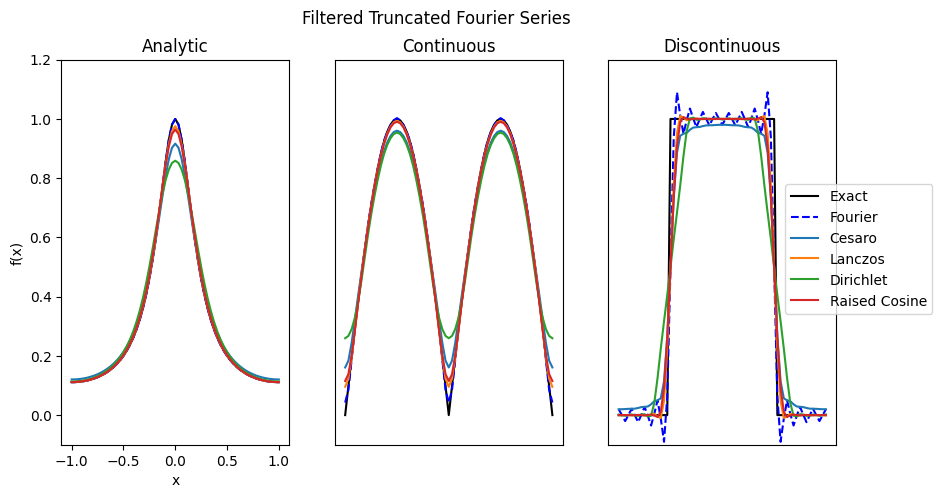

In [6]:
# Plot filtered functions
print(np.shape(fcosmod))
FSmod = np.zeros((3,5,Nx+1))
plt.figure()
plt.suptitle('Filtered Truncated Fourier Series')
for m in np.arange(3): # Loop over functions
    for mfilter in np.arange(4): # Loop over filters
        for j in np.arange(Nx+1): # Loop over x
            FSmod[m,mfilter,j] = np.dot(fcosmod[:,m,mfilter],Costerm[j,:])+np.dot(fsinmod[:,m,mfilter],Sinterm[j,:])

    if m == 0:
        plt.subplot(131)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Analytic')
    elif m == 1:
        plt.subplot(132)
        plt.title('Continuous')
    else:
        plt.subplot(133)
        plt.title('Discontinuous')
        
    plt.plot(x,fexact[m,:],'k',x,FS[m,:],'b--')
    plt.plot(x,FSmod[m,0,:],x,FSmod[m,1,:],x,FSmod[m,2,:],x,FSmod[m,3,:])
    plt.ylim([-0.1,1.2])

    if m != 0:
        plt.yticks([])
        plt.xticks([])

plt.figlegend(['Exact','Fourier','Cesaro','Lanczos','Dirichlet','Raised Cosine'],loc='outside center right')

## The Filter that technically is not a filter, i.e. *Exponential Filter*

The exponential filter technically does not satisfy the definition of a filter, but is often used.  It is defined as 
$$\sigma(\eta) =  \begin{cases} 1, \quad & \eta \le |\eta_c| \\
 \text{exp}(-\alpha(\frac{\eta-\eta_c}{1-\eta_c})^m) \quad & |\eta| \ge \eta_c 
 \end{cases}$$



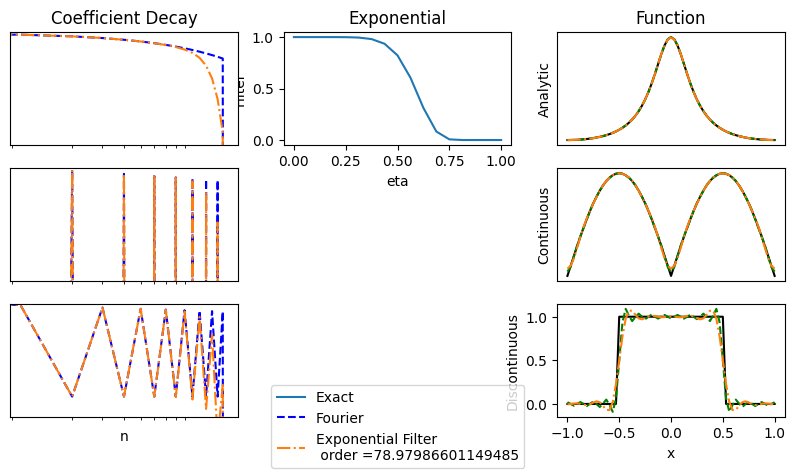

In [7]:
# Exponential filter
# Increasing m and/or etacutoff decreases the dissipation while increasing
# alpha has the opposite effect.
morder = 8
alpha = 50.0
etacutoff = 0

etatilda = -alpha*(np.divide((eta-etacutoff),(1-etacutoff)))**morder
filter[:,4] = np.piecewise(eta, [eta < etacutoff, eta >= etacutoff], [1, np.exp(etatilda)])

plt.figure()
plt.subplot(332)
plt.plot(eta,filter[:,4])
plt.xlabel('eta')
plt.ylabel('Filter')
plt.title('Exponential')

for m in np.arange(3): # Loop over functions
    fcosmod[:,m,4] = np.multiply(filter[:,4],fcos[:,m])
    fsinmod[:,m,4] = np.multiply(filter[:,4],fsin[:,m])
    
    fhatmod[:,m,4] = np.sqrt(fcosmod[:,m,4]**2 + fsinmod[:,m,4]**2)
    
    fhatmodorders[4:Nhalf-1:2,m,4] = np.log(np.divide(fhatmod[2:Nhalf-3:2,m,4],fhatmod[4:Nhalf-1:2,m,4]))/np.log(np.divide(nwav[4:Nhalf-1:2],nwav[2:Nhalf-3:2]))

    
    for j in np.arange(Nx+1): # Loop over x        
        FSmod[m,4,j] = np.dot(fcosmod[:,m,4],Costerm[j,:]) + np.dot(fsinmod[:,m,4],Sinterm[j,:])

    if m == 0:
        plt.subplot(331)
        plt.title('Coefficient Decay')
    elif m == 1:
        plt.subplot(334)
    else:
        plt.subplot(337)
        
    # plot original coefficient decay as well as modified
    plt.loglog(nwav,fhat[:,m],'b--')
    plt.loglog(nwav,fhatmod[:,m,4],'-.',color='tab:orange')
    plt.ylim([10**(-20),10**0])
    if m !=2:
        plt.yticks([])
        plt.xticks([])

    if m == 2: 
        plt.subplot(337)
        plt.xlabel('n')

    # plot function, original fourier series, and modified
    if m == 0:
        plt.subplot(333)
        plt.title('Function')
        plt.ylabel('Analytic')
    elif m == 1:
        plt.subplot(336)
        plt.ylabel('Continuous')
    else:
        plt.subplot(339)
        plt.ylabel('Discontinuous')
        plt.xlabel('x')
    
    # plot original coefficient decay as well as modified
    plt.plot(x,fexact[m,:],'k',x,FS[m,:],'g--')
    plt.plot(x,FSmod[m,4,:],'-.',color='tab:orange')
    
    if m !=2:
        plt.yticks([])
        plt.xticks([])
    
    if m == 2:
        plt.subplot(337)
        plt.figlegend(['Exact','Fourier','Exponential Filter\n order ='+str(np.max(fhatmodorders[:,m,4]))],loc='outside lower center')
        plt.yticks([])
        plt.xticks([])


## General Filter
In general, a filter of order $r+1$ can be defined as
$$\sigma(x) = \sum_{\gamma = 0}^r\, c_\gamma \psi(x-x_\gamma)$$
Where $c_\gamma$ is defined by enforcing consistency:
$$  \int\, \sigma(y)\, dy = 1$$
and $r$ moments (with zero mean):
$$  \int\, \sigma(y)y^n\, dy = x^n, \qquad n = 1,\dots,r$$

One example is taking $\psi$ to be a B-Spline of order $m$, 
$$\psi(x) = B_m(x) = \underbrace{\chi*\cdots*\chi}_{m\text{ times}},$$
with $c_\gamma = \lceil \frac{r}{2} \rceil - \gamma.$

$m$ controls the amount of smoothness/dissipation.

$r$ controls what order of accuracy is possible.




In [8]:

# Obtain the B-spline weights that give the kernel coefficients.  
# If the B-spline order is large, this matrix become ill-conditioned.

from scipy.special import binom
#  import matplotlib.pyplot as plt
import math
#import np.linalg                                                                                                                                                   
import scipy.linalg   # SciPy Linear Algebra Library                                                                                                                
from scipy.linalg import lu
from scipy.linalg import lu_factor
from scipy.linalg import lu_solve

# !!! These can be changed !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Number of Moment conditions --- should be even
moments = 6
RS = np.ceil(moments/2)
RS = int(RS)

# B-Spline order = BSorder
BSorder = 2
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Number of B-Splines = moments + 1
numspline = moments + 1

# Define matrix to determine kernel coefficients
A=np.zeros((numspline,numspline))
for m in np.arange(numspline):
    for gam in np.arange(numspline):
        component = 0.
        for n in np.arange(m+1):
            jsum = 0.
            jsum = sum((-1)**(j+BSorder-1)*binom(BSorder-1,j)*((j-0.5*(BSorder-2))**(BSorder+n)-(j-0.5*BSorder)**(BSorder+n)) for j in np.arange(BSorder))
            component += binom(m,n)*(gam-RS)**(m-n)*math.factorial(n)/math.factorial(n+BSorder)*jsum

            A[m][gam] = component


b=np.zeros((numspline))
b[0]=1.

cgamtemp = np.zeros((numspline))
cgam = np.zeros((RS+1))
#call the lu_factor function LU = linalg.lu_factor(A)
Piv = scipy.linalg.lu_factor(A)
#P, L, U = scipy.linalg.lu(A)
#solve given LU and B
cgamtemp = scipy.linalg.lu_solve(Piv, b)
for igam in np.arange(RS+1):
    cgam[igam] = cgamtemp[RS-igam]
    


print('SIAC coefficients for Fourier filter:',cgam)

# check coefficients add to one
sumcoeff = sum(cgamtemp[n] for n in np.arange(numspline))
print('Sum of coefficients',sumcoeff) 


SIAC coefficients for Fourier filter: [ 1.26904762 -0.15456349  0.0218254  -0.00178571]
Sum of coefficients 0.9999999999999998


## Fourier Form of Filter

The Fourier Form of the filter consisting of $r+1$ B-Splines of order $n$ is 
$$\sigma(\omega_n) = \left(\frac{\sin(\omega_n/2)}{\omega_n/2}\right)^n\left(c_0 + 2\sum_{\gamma = 0}^r\, c_\gamma \cos(\gamma\omega_n))\right)$$

Text(0.5, 1.0, 'Filter satisfying 6 moments with dissipation order 2')

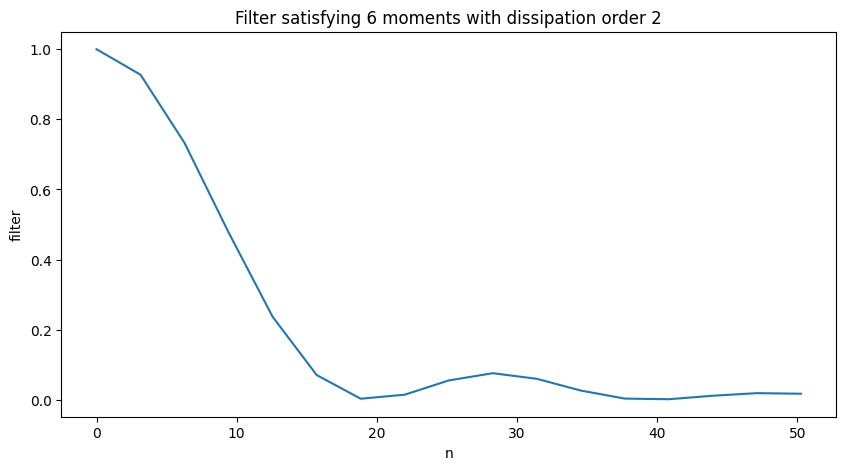

In [9]:
# cosine sum
cgamterm = cgam[0]*np.ones((Nhalf+1))
for igam in np.arange(1,RS+1):
    #cgamterm = cgamterm + 2*(cgam[igam]*np.cos(igam*omegan))
    cgamterm = cgamterm + 2*(cgam[igam]*np.cos(igam*nwav/math.pi))

# Define the filter
# Account for python's sinc(x) definition, which is sin(pi x)/(pi x)
mfilter = np.int8(4)
#filter[:,mfilter] = np.multiply((np.sinc(0.5*omegan/math.pi))**BSorder,cgamterm)
filter[:,mfilter] = np.multiply((np.sinc(0.5*nwav/math.pi))**BSorder,cgamterm)


plt.figure()
plt.plot(omegan,filter[:,mfilter])
plt.xlabel('n')
plt.ylabel('filter')
plt.title('Filter satisfying '+str(moments)+' moments with dissipation order '+str(BSorder))


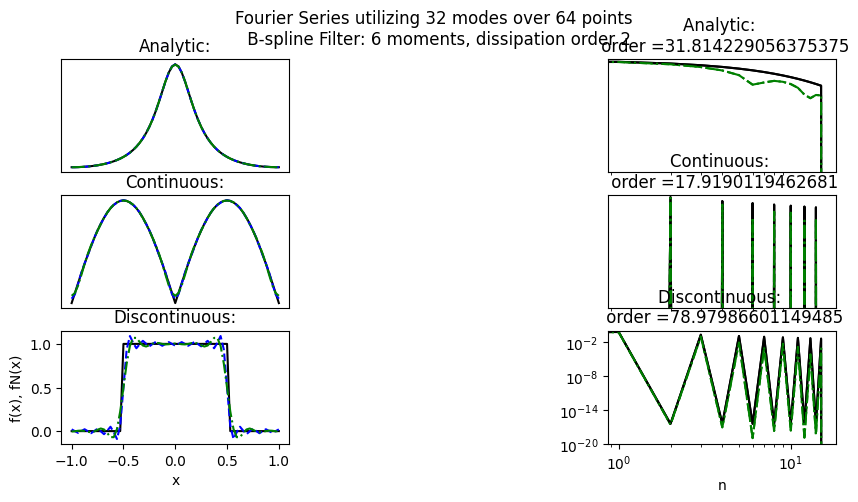

In [10]:

# Modified Fourier Coefficients.
plt.figure()
plt.suptitle('Fourier Series utilizing '+str(N)+' modes over '+str(Nx)+' points \n B-spline Filter: '+str(moments)+' moments, dissipation order '+str(BSorder))

for m in np.arange(3):
    # filtered cosine/sine coefficients --> in terms of Nhalf
    fcosmod[:,m,mfilter] = np.multiply(filter[:,mfilter],fcos[:,m])
    fsinmod[:,m,mfilter] = np.multiply(filter[:,mfilter],fsin[:,m])
        
    fhatmod[:,m,mfilter] = np.sqrt(fcosmod[:,m,mfilter]**2 + fsinmod[:,m,mfilter]**2)
        
    if m == 0:
        fhatmodorders[3:-1,0,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[2:-2,0,mfilter],fhatmod[3:-1,0,mfilter]))),np.log(np.divide(nwav[3:-1],nwav[2:-2])))
    elif m==1:
        fhatmodorders[4:-1:2,1,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[2:-3:2,1,mfilter],fhatmod[4:-1:2,1,mfilter]))),np.log(np.divide(nwav[4:-1:2],nwav[2:-3:2])))
    else:
        fhatmodorders[3:-1:2,2,mfilter] = np.divide(np.log(np.abs(np.divide(fhatmod[1:-3:2,2,mfilter],fhatmod[3:-1:2,2,mfilter]))),np.log(np.divide(nwav[3:-1:2],nwav[1:-3:2])))
        
    
    if m == 0:
        plt.subplot(331)
        plt.title('Analytic:')
    elif m == 1:
        plt.subplot(334)
        plt.title('Continuous:')
    else:
        plt.subplot(337)
        plt.title('Discontinuous:')
        plt.ylabel('f(x), fN(x)')
        plt.xlabel('x')
        
    plt.plot(x,fexact[m,:],'k',x,FS[m,:],'b--')
    plt.plot(x,FSmod[m,mfilter,:],'g-.')

    if m !=2:
        plt.yticks([])
        plt.xticks([])

    if m == 0:
        plt.subplot(333)
        plt.title('Analytic:')
    elif m == 1:
        plt.subplot(336)
        plt.title('Continuous:')
    else:
        plt.subplot(339)
        plt.title('Discontinuous:')
        plt.xlabel('n')
        
    plt.loglog(nwav,fhat[:,m],'k')
    plt.loglog(nwav,fhatmod[:,m,mfilter],'g--')
    #plt.ylim([10**(-20),10**0])
    if m != 2:
        plt.yticks([])
        plt.xticks([])
        
    if m == 0:
        plt.subplot(333)
        plt.title('Analytic: \n order ='+str(np.max(fhatmodorders[:,m,mfilter])))
    elif m == 1:
        plt.subplot(336)
        plt.title('Continuous: \n order ='+str(np.max(fhatmodorders[:,m,mfilter])))
    else:
        plt.subplot(339)
        plt.title('Discontinuous: \n order ='+str(np.max(fhatmodorders[:,m,mfilter])))
        plt.xlabel('n')
        
    plt.loglog(nwav,fhat[:,m],'k')
    plt.loglog(nwav,fhatmod[:,m,mfilter],'g-.')
    plt.ylim([10**(-20),10**0])    
    #plt.legend('Fourier','B-spline Filter \n order ='+str(np.mean(fhatmodorders[:,m,mfilter])))

    if m != 2:
        plt.yticks([])
        plt.xticks([])
    

#plt.figlegend('Fourier','B-spline Filter \n order ='+str(np.mean(fhatmodorders[:,m,mfilter])))

